# Airbnb Listing Case_Study

---

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas as pd
import numpy as np
import warnings
import re

In [2]:
warnings.filterwarnings('ignore')

In [ ]:
# read csv file
df = pd.read_csv('Airbnb_listings_Data.csv', encoding='latin-1')

In [4]:
# overview of dataframe
df.sample(3)

,host_id,host_name,city,state,zipcode,country,latitude,longitude,property_type,room_type,...,beds,bed_type,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
2817,7118,New-Yorker,New York,NY,10036,United States,40.762600,-73.993045,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$200.00,364,13,85.0,9.0,10.0,9.0
4948,906434,Lynn,Brooklyn,NY,11221,United States,40.697813,-73.928422,Apartment,Private room,...,1.0,Real Bed,NaN,$75.00,75,0,NaN,NaN,NaN,NaN
20949,4310782,Mary,Brooklyn,NY,11221,United States,40.694922,-73.933466,Apartment,Entire home/apt,...,2.0,Real Bed,NaN,$130.00,362,6,100.0,9.0,9.0,10.0


<b>host_name</b> is as same as <b>host_id</b> and there is no correlation between this column with the target column, that's why drop it

In [5]:
# droping unnecessary column
df.drop('host_name', axis=1, inplace=True)

In [6]:
df['price'].head(3)

0    $160.00
1    $105.00
2     $58.00
Name: price, dtype: object

In [7]:
# extracting the price
num = 0
for price in df['price']:
    df['price'][num] = int(re.search('[^$]\d*',price).group())
    num += 1

In [8]:
# converting the price into int column 
df['price'] = df['price'].astype(str).astype(int)

In [9]:
df['price'].head(3)

0    160
1    105
2     58
Name: price, dtype: int64

In [10]:
# summery of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27392 entries, 0 to 27391
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    27392 non-null  int64  
 1   city                       27392 non-null  object 
 2   state                      27390 non-null  object 
 3   zipcode                    27230 non-null  object 
 4   country                    27391 non-null  object 
 5   latitude                   27392 non-null  float64
 6   longitude                  27392 non-null  float64
 7   property_type              27386 non-null  object 
 8   room_type                  27392 non-null  object 
 9   accommodates               27392 non-null  int64  
 10  bathrooms                  26929 non-null  float64
 11  bedrooms                   27252 non-null  float64
 12  beds                       27294 non-null  float64
 13  bed_type                   27392 non-null  obj

27392 rows and 21 columns are there and taking 4.6+ MB memory.
There are 10 float, 7 object and 5 integer columns.

---

## Exploratory Data Analysis

### Observations on shape of data and data types of all attributes

In [11]:
# checking the shpae of the dataframe
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 27392
Number of columns : 22


In [12]:
# checking data types of all the attributes
print(f'Column Name              Type of Data')
print('-'*50)
df.dtypes

Column Name              Type of Data
--------------------------------------------------


host_id                        int64
city                          object
state                         object
zipcode                       object
country                       object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
square_feet                  float64
price                          int64
availability_365               int64
number_of_reviews              int64
review_scores_rating         float64
review_scores_cleanliness    float64
review_scores_location       float64
review_scores_value          float64
dtype: object

### Check for missing value

In [13]:
# missing values check
df.isna().sum()

host_id                          0
city                             0
state                            2
zipcode                        162
country                          1
latitude                         0
longitude                        0
property_type                    6
room_type                        0
accommodates                     0
bathrooms                      463
bedrooms                       140
beds                            98
bed_type                         0
square_feet                  26386
price                            0
availability_365                 0
number_of_reviews                0
review_scores_rating          8657
review_scores_cleanliness     8731
review_scores_location        8732
review_scores_value           8734
dtype: int64

There are some columns which is having null values

In [14]:
# missing value check percentage wise
df.isna().mean()*100

host_id                       0.000000
city                          0.000000
state                         0.007301
zipcode                       0.591414
country                       0.003651
latitude                      0.000000
longitude                     0.000000
property_type                 0.021904
room_type                     0.000000
accommodates                  0.000000
bathrooms                     1.690275
bedrooms                      0.511098
beds                          0.357769
bed_type                      0.000000
square_feet                  96.327395
price                         0.000000
availability_365              0.000000
number_of_reviews             0.000000
review_scores_rating         31.604118
review_scores_cleanliness    31.874270
review_scores_location       31.877921
review_scores_value          31.885222
dtype: float64

Can see the <b>square_feet</b> column has <b>96.3%</b> value is missing and cann't fill this much of missing values with central tendancy method because it's distribution plot will be dense with mean/median, thay's why drop that column.

In [15]:
df.drop('square_feet', axis=1, inplace=True)

### Display the statistical summary

In [16]:
# mathematical overview of dataframe
df.describe()

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
count,2.739200e+04,27392.000000,27392.000000,27392.000000,26929.000000,27252.000000,27294.000000,27392.000000,27392.000000,27392.000000,18735.000000,18661.000000,18660.000000,18658.000000
mean,8.518927e+06,40.733070,-73.964276,2.892779,1.116287,1.135660,1.531289,154.954585,262.919210,10.130221,92.218895,9.011093,9.248660,9.125737
std,7.510027e+06,0.048968,0.035162,1.755137,0.369832,0.667599,1.098971,110.616450,125.668249,18.665400,8.336264,1.163870,0.973474,0.906612
min,2.830000e+02,40.509611,-74.239539,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000
25%,2.104498e+06,40.699655,-73.988449,2.000000,1.000000,1.000000,1.000000,85.000000,177.000000,0.000000,89.000000,8.000000,9.000000,9.000000
50%,6.119374e+06,40.728024,-73.966075,2.000000,1.000000,1.000000,1.000000,129.000000,333.000000,3.000000,94.000000,9.000000,10.000000,9.000000
75%,1.392422e+07,40.764030,-73.947260,4.000000,1.000000,1.000000,2.000000,195.000000,363.000000,11.000000,99.000000,10.000000,10.000000,10.000000
max,2.546867e+07,40.907704,-73.726710,16.000000,8.000000,10.000000,16.000000,999.000000,365.000000,221.000000,100.000000,10.000000,10.000000,10.000000


### Univariate Analysis and Bivariate Analysis of the attributes

#### Correlation

In [17]:
df_numerical = df.drop(df.select_dtypes(include='object'), axis=1)

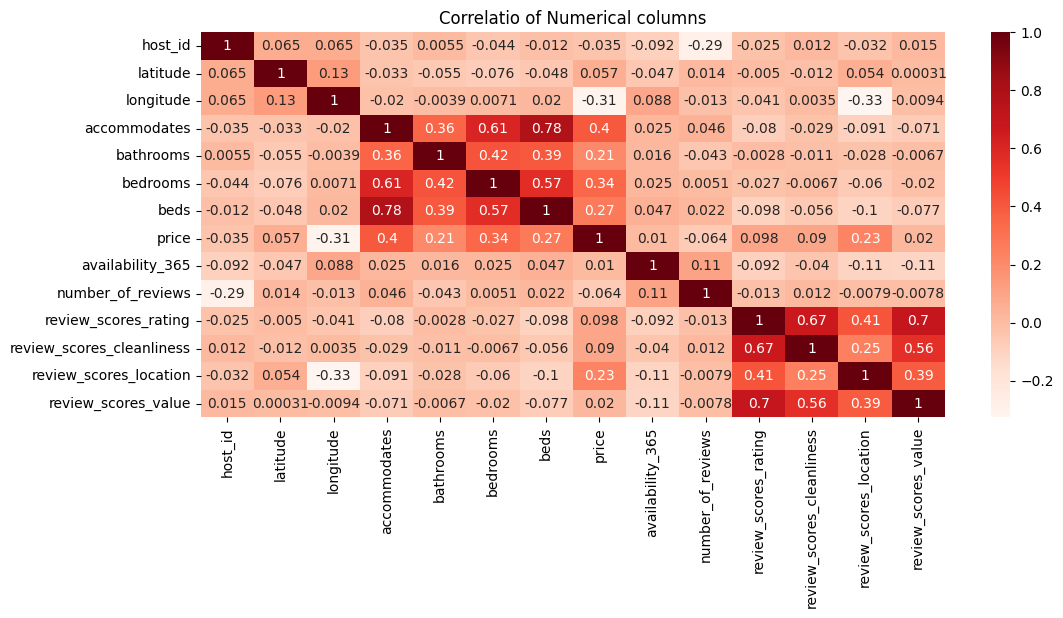

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(df_numerical.corr(), cmap='Reds', annot=True)
plt.title('Correlatio of Numerical columns')
plt.show()

<b>longitude</b> and <b>number_of_reviews</b> columns are negatively corelated with <b>target column</b> and <b>latitude</b> is not negatively but least corelated with <b>target column</b> that's why drop them.

In [19]:
df.drop(['longitude','latitude','number_of_reviews'], axis=1, inplace=True)

#### Univariate Analysis

In [20]:
# checking for state column
df['state'].value_counts()

state
NY                      27386
Ny                          2
Queens NY 11377, USA        1
ny                          1
Name: count, dtype: int64

Here, NY state's count is 27386 and other is written the same but in different manner, that's why make them all <b>NY</b> state. 

In [21]:
# filling the NY to all the cell of state column
df['state'] = 'NY'

In [22]:
# checkin for the state column again after filling the NY value
state = df['state'].value_counts()
state

state
NY    27392
Name: count, dtype: int64

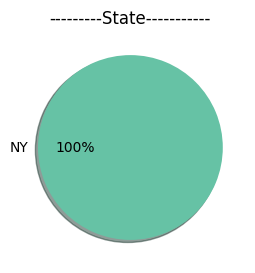

In [23]:
# visualization of state column with pie chart
plt.figure(figsize=(5,3))
plt.pie(state.values, labels=state.index,
       autopct='%2.f%%', textprops={'fontsize':10},
       colors = sns.color_palette('Set2'), shadow=True)
plt.title('---------State-----------')
plt.show()

In [24]:
# checking for the country column
country = df['country'].value_counts()
country

country
United States    27391
Name: count, dtype: int64

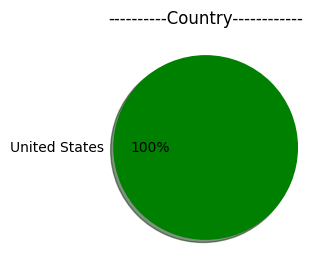

In [25]:
# visualization of country column with pie chart
plt.figure(figsize=(5,3))
plt.pie(country.values, labels=country.index,
       autopct='%2.f%%', textprops={'fontsize':10},
       colors = 'green' , shadow=True)
plt.title('----------Country------------')
plt.show()

Here, can see that all the rental house are in <b>United State</b> country of <b>New York</b> city

In [26]:
# checking for room type
room_type = df['room_type'].value_counts().reset_index()
room_type

,room_type,count
0,Entire home/apt,15977
1,Private room,10586
2,Shared room,829


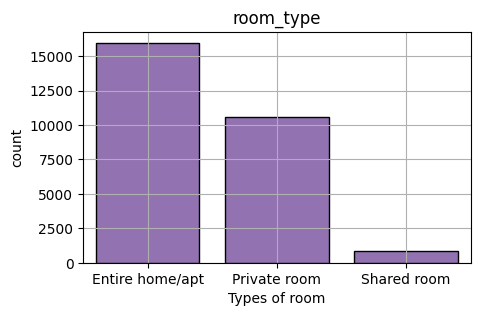

In [27]:
# visualizing of room_type
plt.figure(figsize=(5,3))
sns.barplot(x=room_type['room_type'], y=room_type['count'], color = 'C4', edgecolor = 'black')
plt.title('room_type')
plt.xlabel('Types of room')
plt.ylabel('count')
plt.grid()
plt.show()

In [28]:
# checking for property type
property_type = df['property_type'].value_counts()
property_type

property_type
Apartment          24909
House               1575
Loft                 601
Bed & Breakfast      170
Dorm                  49
Other                 48
Boat                  11
Treehouse              6
Villa                  4
Tent                   3
Cabin                  3
Hut                    1
Castle                 1
Chalet                 1
Cave                   1
Earth House            1
Lighthouse             1
Camper/RV              1
Name: count, dtype: int64

Here, can see in <b>propert_type</b> column the <b>Apartment</b> cell is dominating to the other cells and the tail of the property_type is having one counts which is not going to impact on the <b>target column</b>, so we can create a new cell with the name of <b>House</b> for those cells which is having less than 900 counts.

In [29]:
# creating a list
alist = []
for i in df['property_type']:
    if i != 'Apartment':
        alist.append('House')
    else:
        alist.append(i)

In [30]:
# assign alist to property_type column
df['property_type'] = alist

In [31]:
# checking for the property_type column again
property_type = df['property_type'].value_counts().reset_index()
property_type

,property_type,count
0,Apartment,24909
1,House,2483


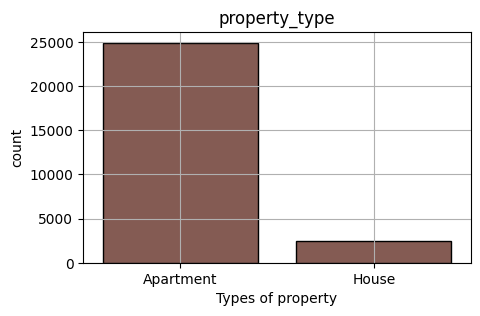

In [32]:
# visualizing the property_type 
plt.figure(figsize=(5,3))
sns.barplot(x=property_type['property_type'], y=property_type['count'], color = 'C5', edgecolor = 'black')
plt.title('property_type')
plt.xlabel('Types of property')
plt.ylabel('count')
plt.grid()
plt.show()

In [33]:
# checking for the bed_type
df['bed_type'].value_counts().reset_index()

,bed_type,count
0,Real Bed,26275
1,Futon,484
2,Pull-out Sofa,328
3,Airbed,203
4,Couch,102


Here, can face the same situation that <b>Real Bed</b> cell is dominating the other cells and the rest of the cells individually are not going to impact on the <b>target column</b>, that's why combine them to get a small impact of those cells on target column

In [34]:
# creating a list
lis = []
for bed in df['bed_type']:
    if bed != 'Real Bed':
        lis.append('other type of bed')
    else:
        lis.append(bed)

In [35]:
df['bed_type'] = lis

In [36]:
bed_type = df['bed_type'].value_counts().reset_index()
bed_type

,bed_type,count
0,Real Bed,26275
1,other type of bed,1117


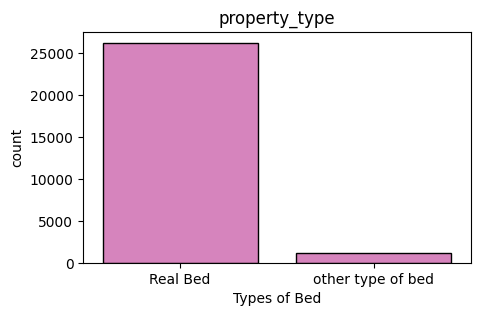

In [37]:
plt.figure(figsize=(5,3))
sns.barplot(x=bed_type['bed_type'], y=bed_type['count'], color = 'C6', edgecolor = 'black')
plt.title('property_type')
plt.xlabel('Types of Bed')
plt.ylabel('count')
plt.show()

#### Bivariate Analysis

In [38]:
# groupby on room_type and extract the mean price 
room_group = round(df.groupby('room_type')['price'].mean(),2).reset_index()

In [39]:
room_group

,room_type,price
0,Entire home/apt,199.97
1,Private room,93.27
2,Shared room,75.17


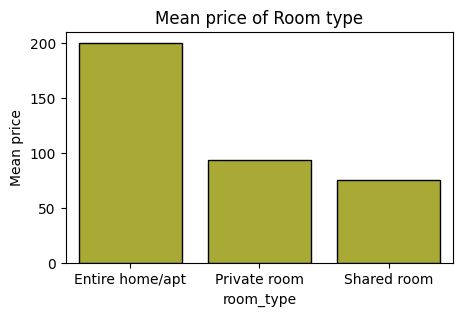

In [40]:
plt.figure(figsize=(5,3))
sns.barplot(x=room_group['room_type'], y=room_group['price'], color='C8', edgecolor='black')
plt.title('Mean price of Room type')
plt.ylabel('Mean price')
plt.show()

Here, mean price of Entire home is more than other room_type which is basically right because we are getting whole house rather than getting a private or shapred room.

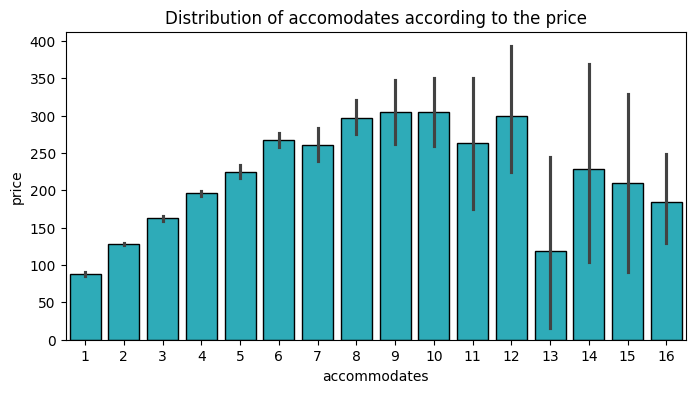

In [41]:
# visializatio of accomodates with price 
plt.figure(figsize=(8,4))
sns.barplot(x=df['accommodates'], y=df['price'], color='C9', edgecolor='black')
plt.title('Distribution of accomodates according to the price')
plt.show()

Here, when the accomodation is 9 or 10 so, the price is high which is obviously right.

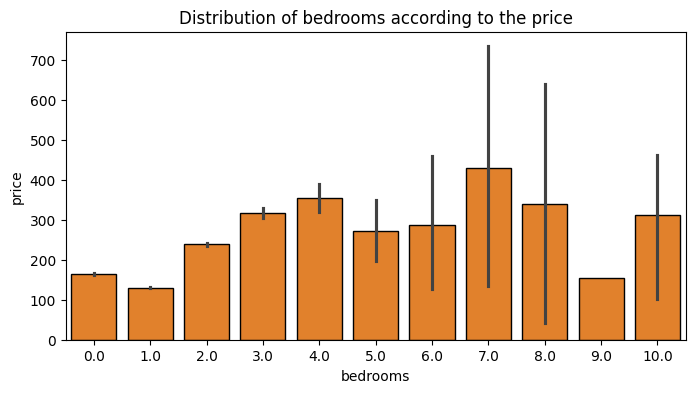

In [42]:
# visializatio of accomodates with price 
plt.figure(figsize=(8,4))
sns.barplot(x=df['bedrooms'], y=df['price'], color='C1', edgecolor='black')
plt.title('Distribution of bedrooms according to the price')
plt.show()

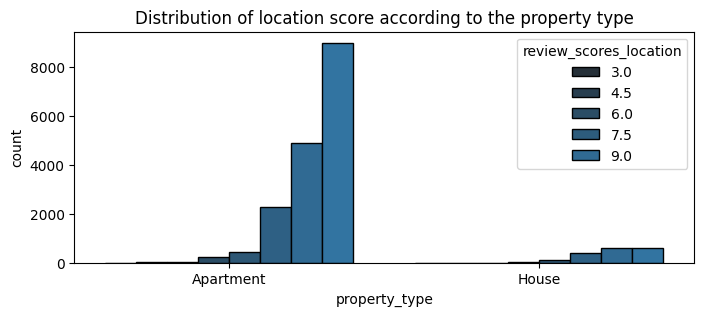

In [43]:
# visualize property_type with location_score
plt.figure(figsize=(8,3))
sns.countplot(x=df['property_type'], hue=df['review_scores_location'], color='C0', edgecolor='black')
plt.title('Distribution of location score according to the property type')
plt.show()

Here, Apartment is getting 8000 reviews which is 9 out of 10 on location.

---

### Ranges of numerical attributes

In [44]:
df_num = df.drop(df.select_dtypes(include='object'), axis=1)

In [45]:
print(f'Min, Max and Range of all Numerical attributes')
print('-'*80)

# finding the range 
for colom in df_num:
    # min and max value of column
    min_ = df[colom].min()
    max_ = df[colom].max()

    # range of attribute
    range_ = max_ - min_ 

    # display range
    print(f'{colom}   Min -> {min_},   Max -> {max_} and   Range -> {range_}\n')

Min, Max and Range of all Numerical attributes
--------------------------------------------------------------------------------
host_id   Min -> 283,   Max -> 25468672 and   Range -> 25468389

accommodates   Min -> 1,   Max -> 16 and   Range -> 15

bathrooms   Min -> 0.0,   Max -> 8.0 and   Range -> 8.0

bedrooms   Min -> 0.0,   Max -> 10.0 and   Range -> 10.0

beds   Min -> 1.0,   Max -> 16.0 and   Range -> 15.0

price   Min -> 1,   Max -> 999 and   Range -> 998

availability_365   Min -> 0,   Max -> 365 and   Range -> 365

review_scores_rating   Min -> 20.0,   Max -> 100.0 and   Range -> 80.0

review_scores_cleanliness   Min -> 2.0,   Max -> 10.0 and   Range -> 8.0

review_scores_location   Min -> 2.0,   Max -> 10.0 and   Range -> 8.0

review_scores_value   Min -> 2.0,   Max -> 10.0 and   Range -> 8.0



### Outliers of various attributes

In [46]:
# function of visualizing outliers
def outlier_check(data,columns):
    i = 1
    plt.figure(figsize=(20,20))
    for colom in columns:
        plt.subplot(4,3,i)
        sns.boxplot(x = data[colom], color='brown')
        plt.title(f'Box plot of {colom}')
        i += 1
    plt.show()

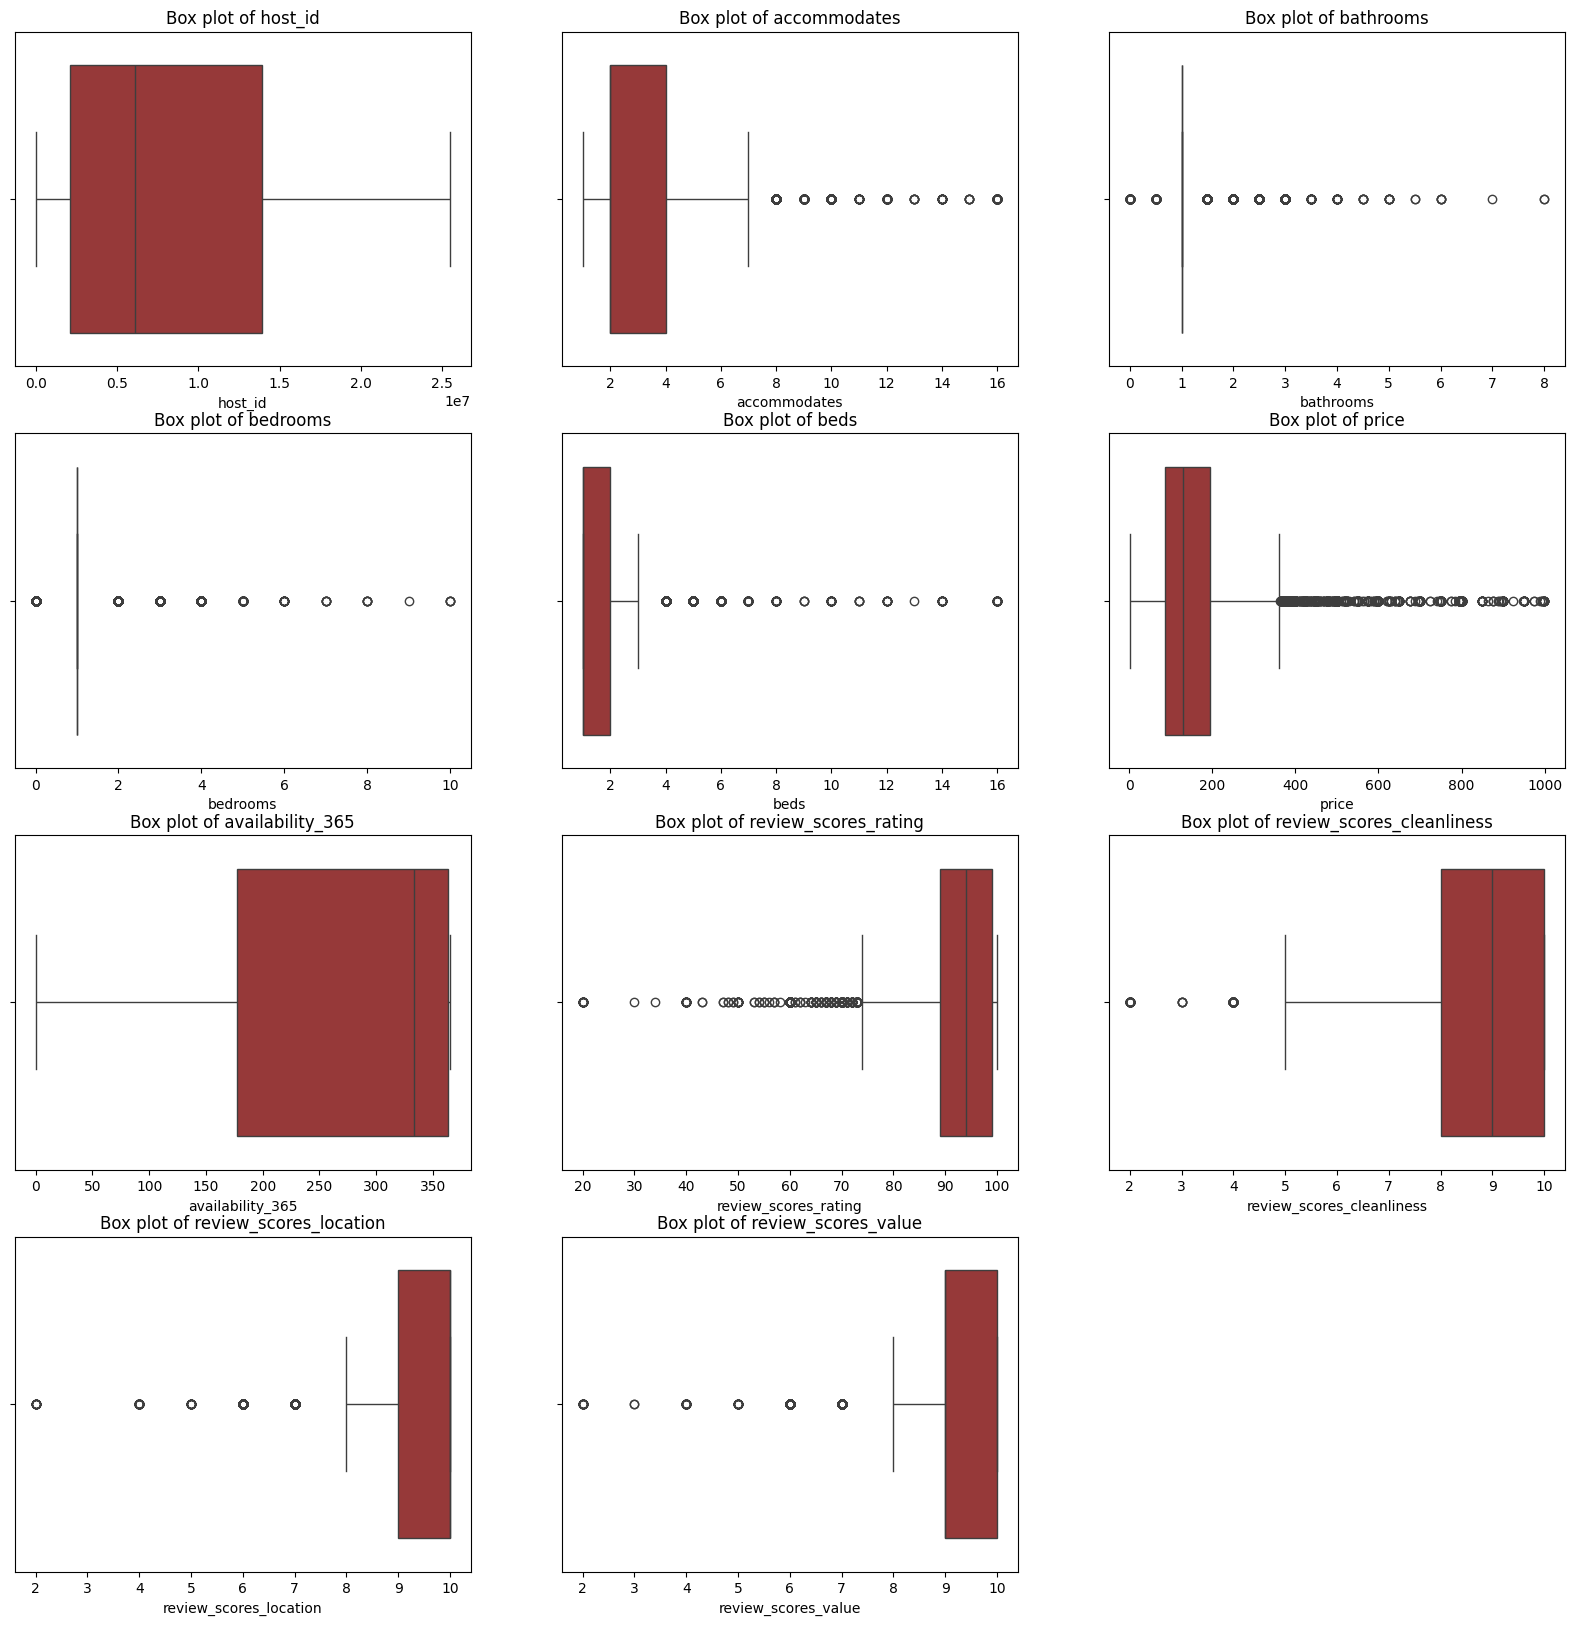

In [47]:
# checking for the outliers with function call
outlier_check(df,df.select_dtypes(include=['float','int']))

Every numeical column has outliers but availabitily column has no outlier.

### Distribution of the attributes

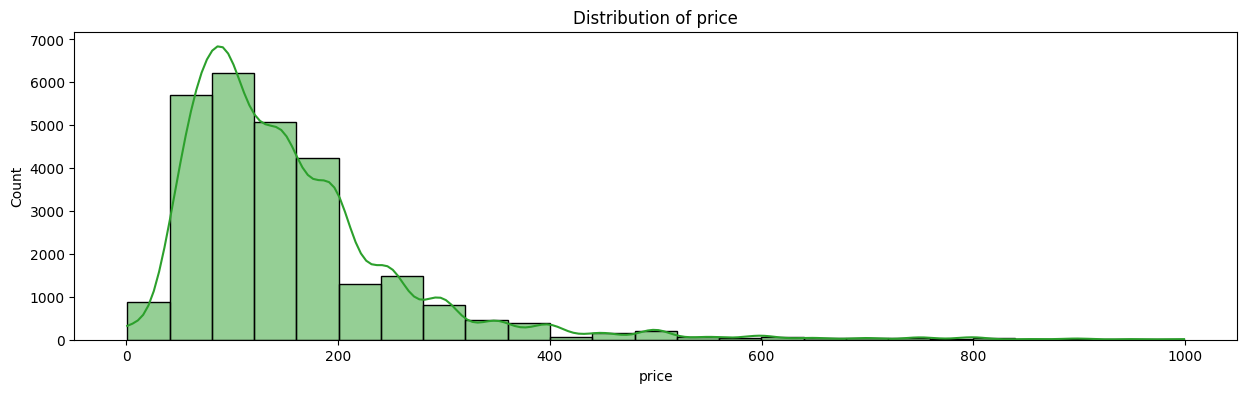

In [48]:
# visualization of price distribution
plt.figure(figsize=(15,4))
sns.histplot(df['price'], bins=25, kde=True, color='C2')
plt.title('Distribution of price')
plt.show()

Approxemately, 6000 rental houses are of <b>80</b> to <b>$150</b> price.

In [49]:
df_num_col = df_num.drop('price', axis=1)

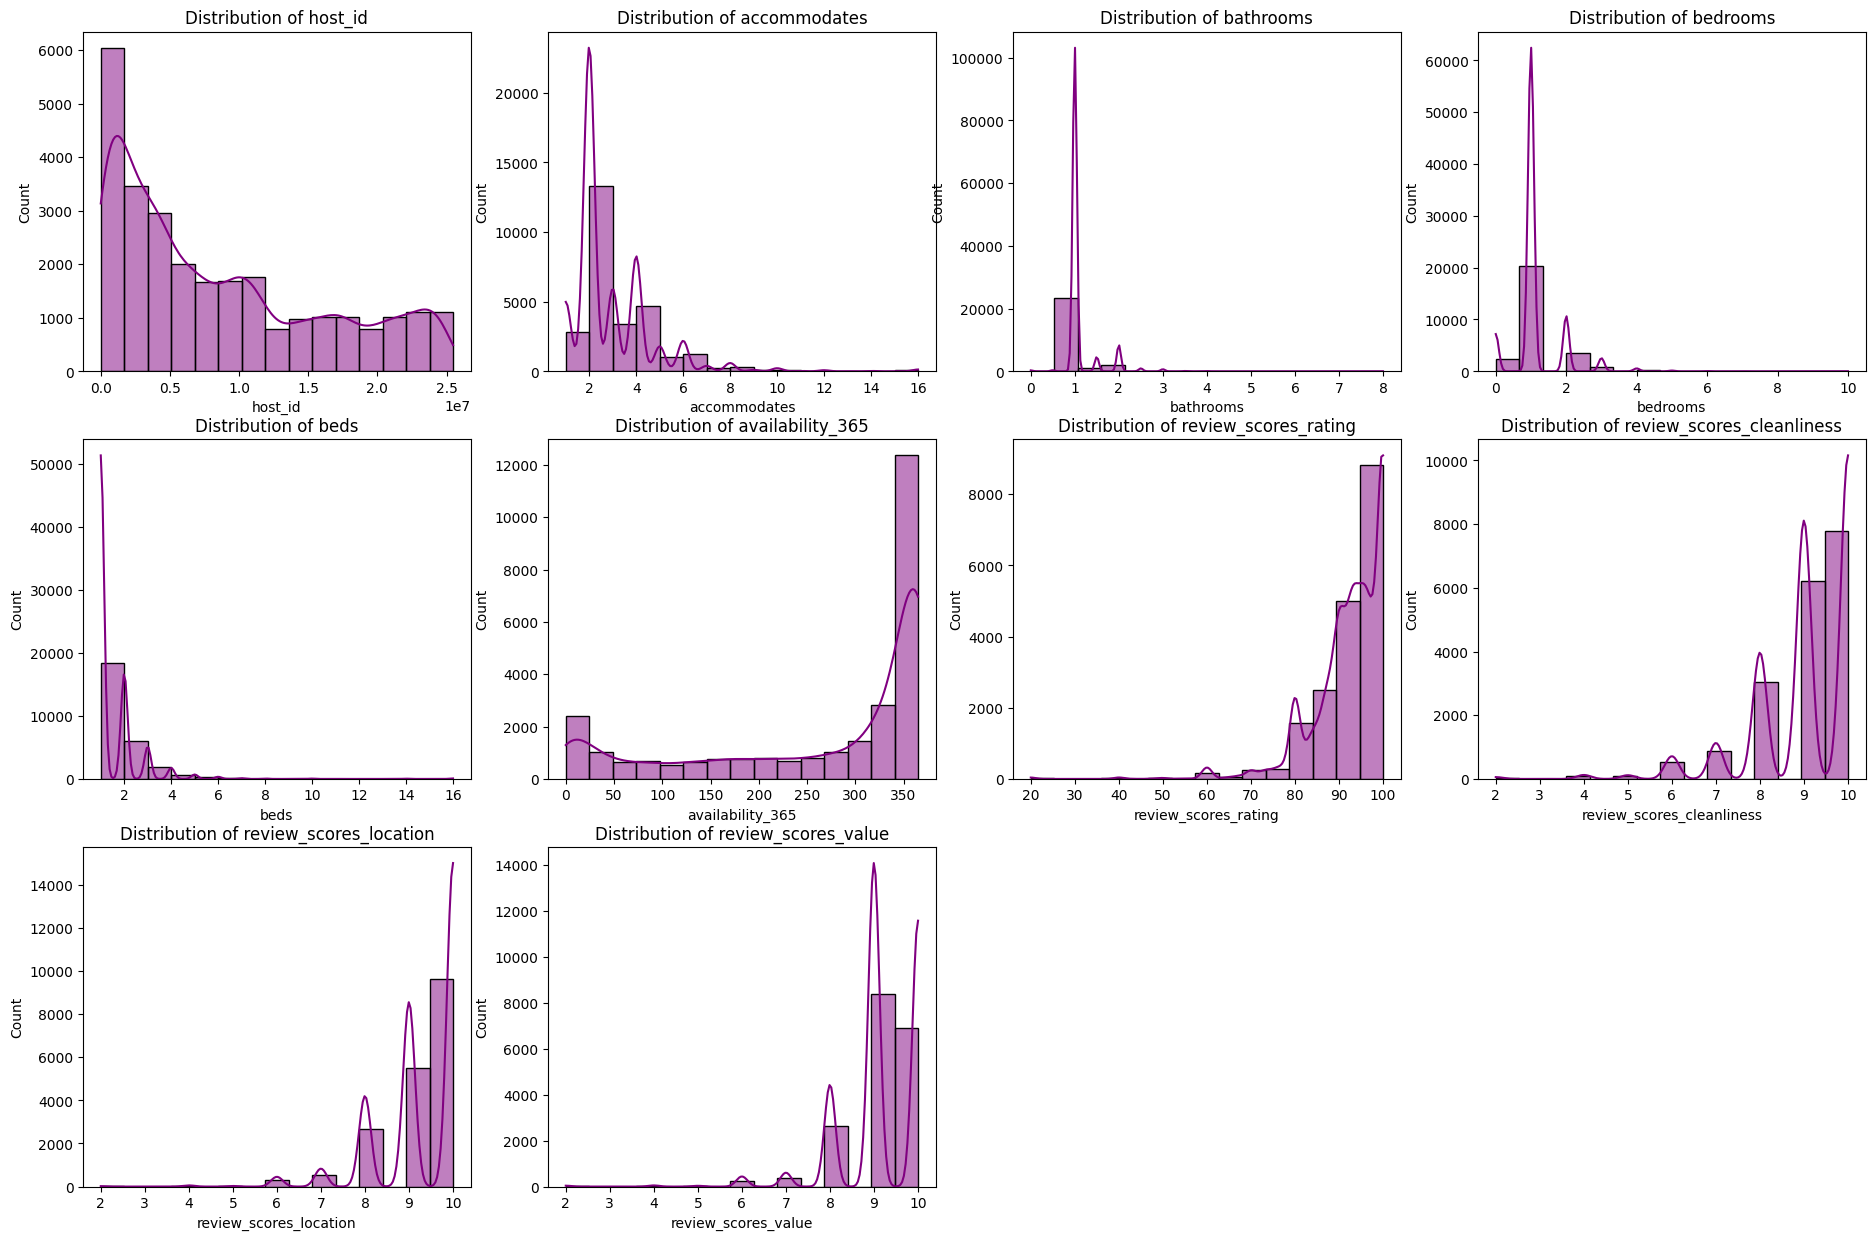

In [50]:
# visualization of numerical distribution
i = 1
plt.figure(figsize=(23,15))
for num_colo in df_num_col:
    plt.subplot(3,4,i)
    sns.histplot(x = df[num_colo], kde=True, bins=15, color='purple')
    plt.title(f'Distribution of {num_colo}')
    i += 1
plt.show()

---

## 2. Data Preprocessing 

### Feature Engineering

Here, going to remove the city column an the country column because all rental house are in the United State country and of New York state it is not going to impact on the target column and negatively corelated with the target column

In [51]:
df.drop(['country','state'], axis=1, inplace=True)

In [52]:
df['city'].value_counts()

city
New York               15656
Brooklyn                9412
Queens                  1142
Bronx                    217
Long Island City         149
                       ...  
Manhattan, NY              1
South Richmond Hill        1
Long Island city           1
NY                         1
____                     1
Name: count, Length: 185, dtype: int64

There are too many cityes which is having the value count one and they are not contributing anything for the target column so, then create a new cell with the name of 'Other city'

In [53]:
# creating a list
alist = []
for city in df['city']:
    if city != 'New York':
        alist.append('Other city')
    else:
        alist.append(city)

In [54]:
df['city'] = alist

In [55]:
df['city'].value_counts()

city
New York      15656
Other city    11736
Name: count, dtype: int64

In [56]:
# checking for the room type
df['room_type'].value_counts()

room_type
Entire home/apt    15977
Private room       10586
Shared room          829
Name: count, dtype: int64

One cell is dominating the other cells, and not giving the good results that's why updating room_type column.

In [57]:
# creating a list
list_a = []
for room in df['room_type']:
    if room != 'Entire home/apt':
        list_a.append('room only')
    else:
        list_a.append(room)

In [58]:
df['room_type'] = list_a

In [59]:
df['room_type'].value_counts()

room_type
Entire home/apt    15977
room only          11415
Name: count, dtype: int64

In [60]:
# creating a new column with bedrooms and bathromms
df['rooms_with_bathrooms'] = df['bedrooms'] + df['bathrooms']

In [61]:
# now drop the bedrooms and bathrooms column 
df.drop(['bedrooms','bathrooms'], axis=1, inplace=True)

### Duplicate value check

In [62]:
# checking for duplicate values
df.duplicated().sum()

np.int64(47)

There are 47 duplicated values which is something 0.2%, if we drop this duplicated values so, it is not going to impact on our dataset.

In [63]:
# treatment of duplicated values
df.drop_duplicates(inplace=True)

In [64]:
# checking againg after treatment
df.duplicated().sum()

np.int64(0)

#### Divide the dataset into features and target column

In [65]:
x = df.drop('price', axis=1)
y = df['price']

#### Split the data into train and test data

In [66]:
# importing library
from sklearn.model_selection import train_test_split

In [67]:
# spliting into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
x_train.shape, x_test.shape

((21876, 14), (5469, 14))

In [69]:
x_train.head(2)

,host_id,city,zipcode,property_type,room_type,accommodates,beds,bed_type,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,rooms_with_bathrooms
24452,11076977,Other city,11206,Apartment,room only,2,1.0,Real Bed,365,NaN,NaN,NaN,NaN,2.0
21312,1935291,New York,10021,House,room only,2,1.0,Real Bed,365,90.0,9.0,10.0,9.0,2.0


### Missing value treatment

In [70]:
# taking out the columns which have null values
def null_columns(df):
    null_col_list = []
    for column in df.columns:
        if df[column].count() != len(df):
            null_col_list.append(column)
    return null_col_list

In [71]:
# calling null_columns functin to get null column list
null_col_list = null_columns(x_train)
print(f'List of Null columns :\n{null_col_list}')

List of Null columns :
['zipcode', 'beds', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value', 'rooms_with_bathrooms']


In [72]:
# dataframe of null values column and checking the null values
null_col = x_train[null_col_list]
null_col.isna().sum()

zipcode                       140
beds                           77
review_scores_rating         6853
review_scores_cleanliness    6914
review_scores_location       6915
review_scores_value          6915
rooms_with_bathrooms          483
dtype: int64

In [73]:
# separating the numerical and categorical columns
num_col = null_col.select_dtypes(include=['float','int'])
cat_col = null_col.select_dtypes(include='object')

#### fill missing values

In [74]:
# funtion to fill missing numerical values with mean 
def num_missing_fill(df,num_coll):
    for colo in num_coll:
        df[colo] = df[colo].fillna(df[colo].median())

In [75]:
# calling num_missing_fill function to fill the numerical values
num_missing_fill(x_train, num_col)

In [76]:
# funtion to fill missing categorical values with mode
def cat_missing_fill(df,cat_coll):
    for colu in cat_coll:
        df[colu] = df[colu].fillna(df[colu].mode()[0])

In [77]:
# calling cat_missing_fill function to fill the categorical values
cat_missing_fill(x_train,cat_col)

In [78]:
# checking for missing values in dataframe
x_train.isna().sum()

host_id                      0
city                         0
zipcode                      0
property_type                0
room_type                    0
accommodates                 0
beds                         0
bed_type                     0
availability_365             0
review_scores_rating         0
review_scores_cleanliness    0
review_scores_location       0
review_scores_value          0
rooms_with_bathrooms         0
dtype: int64

Now, the missing values treatment has been done

### Outlier treatment

In [79]:
# extract numerical column to treat outliers
numerical_coll = x_train.select_dtypes(include=['int','float'])

In [80]:
# function for treatment of outliers 
threshold = 1.5
def treat_outliers(df, numerical_colls):
    for colos in numerical_colls.columns:
    
        # finding q1, q3 and IQR
        q1 = df[colos].quantile(0.25)
        q3 = df[colos].quantile(0.75)
        IQR = q3 - q1
    
        # finding upper wisker and lower wisker
        upper_wisker = q3 + threshold * IQR
        lower_wisker = q1 - threshold * IQR
    
        # capping the outliers
        df[colos] = df[colos].clip(lower=lower_wisker, upper=upper_wisker)

In [81]:
# calling treat_outlier function from treatment
treat_outliers(x_train, numerical_coll)

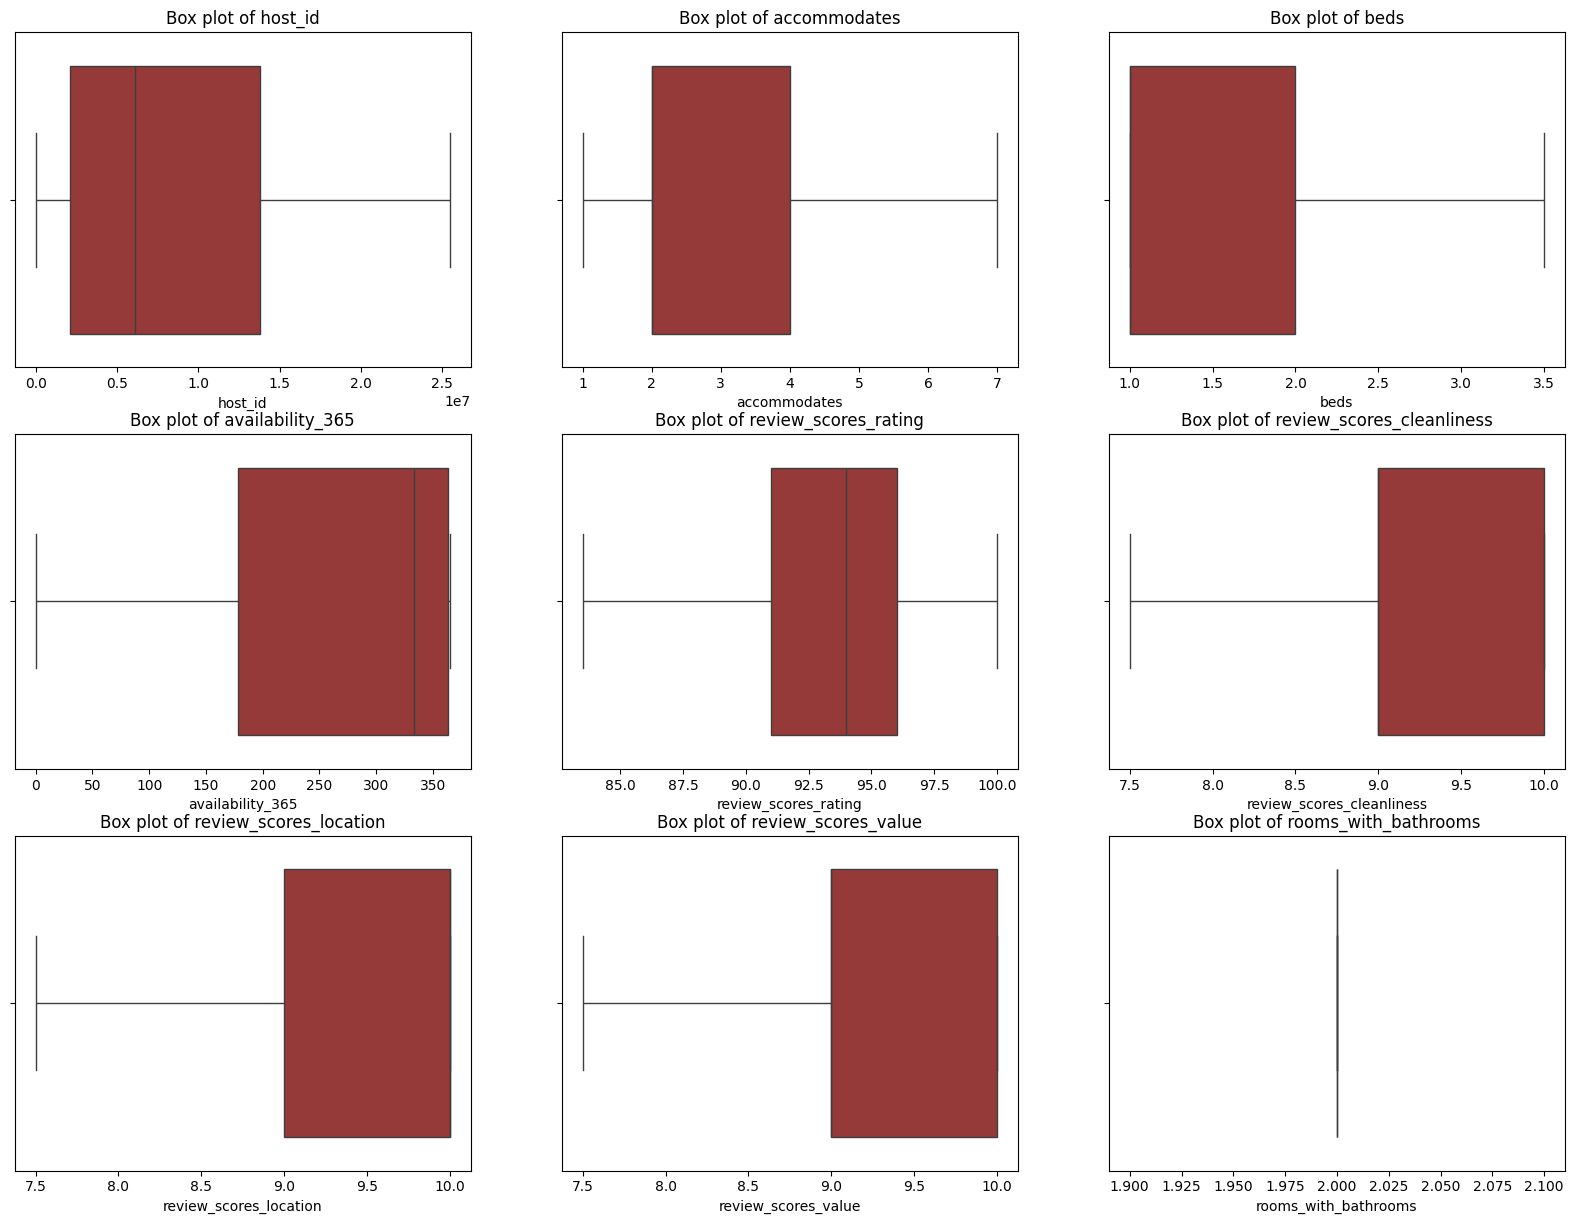

In [82]:
# checking for outliers after treatment
outlier_check(x_train,numerical_coll)

#### Now, all the outliers are treated

### Encoding categorical columns

#### using Target for some categorical columns

In [83]:
# importing library for target encoder
from category_encoders import TargetEncoder

In [84]:
# creating function for target encoder for categorical column
def target_encoder(df, cat_col, target):
    for column in cat_col:
        encoder = TargetEncoder(cols=[column])
        df[column] = encoder.fit_transform(df[column], target)

In [85]:
# extracting columns
cat_coll = x_train[['host_id','zipcode']]

In [86]:
# calling target_encoder function
target_encoder(x_train, cat_coll, y_train)

#### Using OneHotEncoder for categorical columns 

In [87]:
# importing library for One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

In [88]:
# creating function for one hot encoding for categorical columns
def one_hot_encoder(df, cate_col):
    for one in cate_col:
        encoder = OneHotEncoder()
        encoded = encoder.fit_transform(df[[one]])
        df[encoder.categories_[0]] = encoded.toarray().astype(int)

In [89]:
# extracting categorical column
cate_coll = x_train.select_dtypes(include='object')
cate_coll.columns

Index(['city', 'property_type', 'room_type', 'bed_type'], dtype='object')

In [90]:
# calling one_hot_encoder function
one_hot_encoder(x_train, cate_coll)

In [91]:
x_train.sample(3)

,host_id,city,zipcode,property_type,room_type,accommodates,beds,bed_type,availability_365,review_scores_rating,...,review_scores_value,rooms_with_bathrooms,New York,Other city,Apartment,House,Entire home/apt,room only,Real Bed,other type of bed
18503,139.745056,Other city,109.840663,Apartment,room only,1,2.0,Real Bed,365,92.0,...,9.0,2.0,0,1,1,0,0,1,1,0
9038,144.949395,Other city,140.062374,Apartment,room only,2,1.0,Real Bed,247,94.0,...,9.0,2.0,0,1,1,0,0,1,1,0
21814,149.566878,New York,102.754144,Apartment,Entire home/apt,5,3.0,Real Bed,66,94.0,...,9.0,2.0,1,0,1,0,1,0,1,0


In [92]:
# then droping that column
x_train.drop(cate_coll, axis=1, inplace=True)

In [93]:
x_train.columns

Index(['host_id', 'zipcode', 'accommodates', 'beds', 'availability_365',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_value', 'rooms_with_bathrooms',
       'New York', 'Other city', 'Apartment', 'House', 'Entire home/apt',
       'room only', 'Real Bed', 'other type of bed'],
      dtype='object')

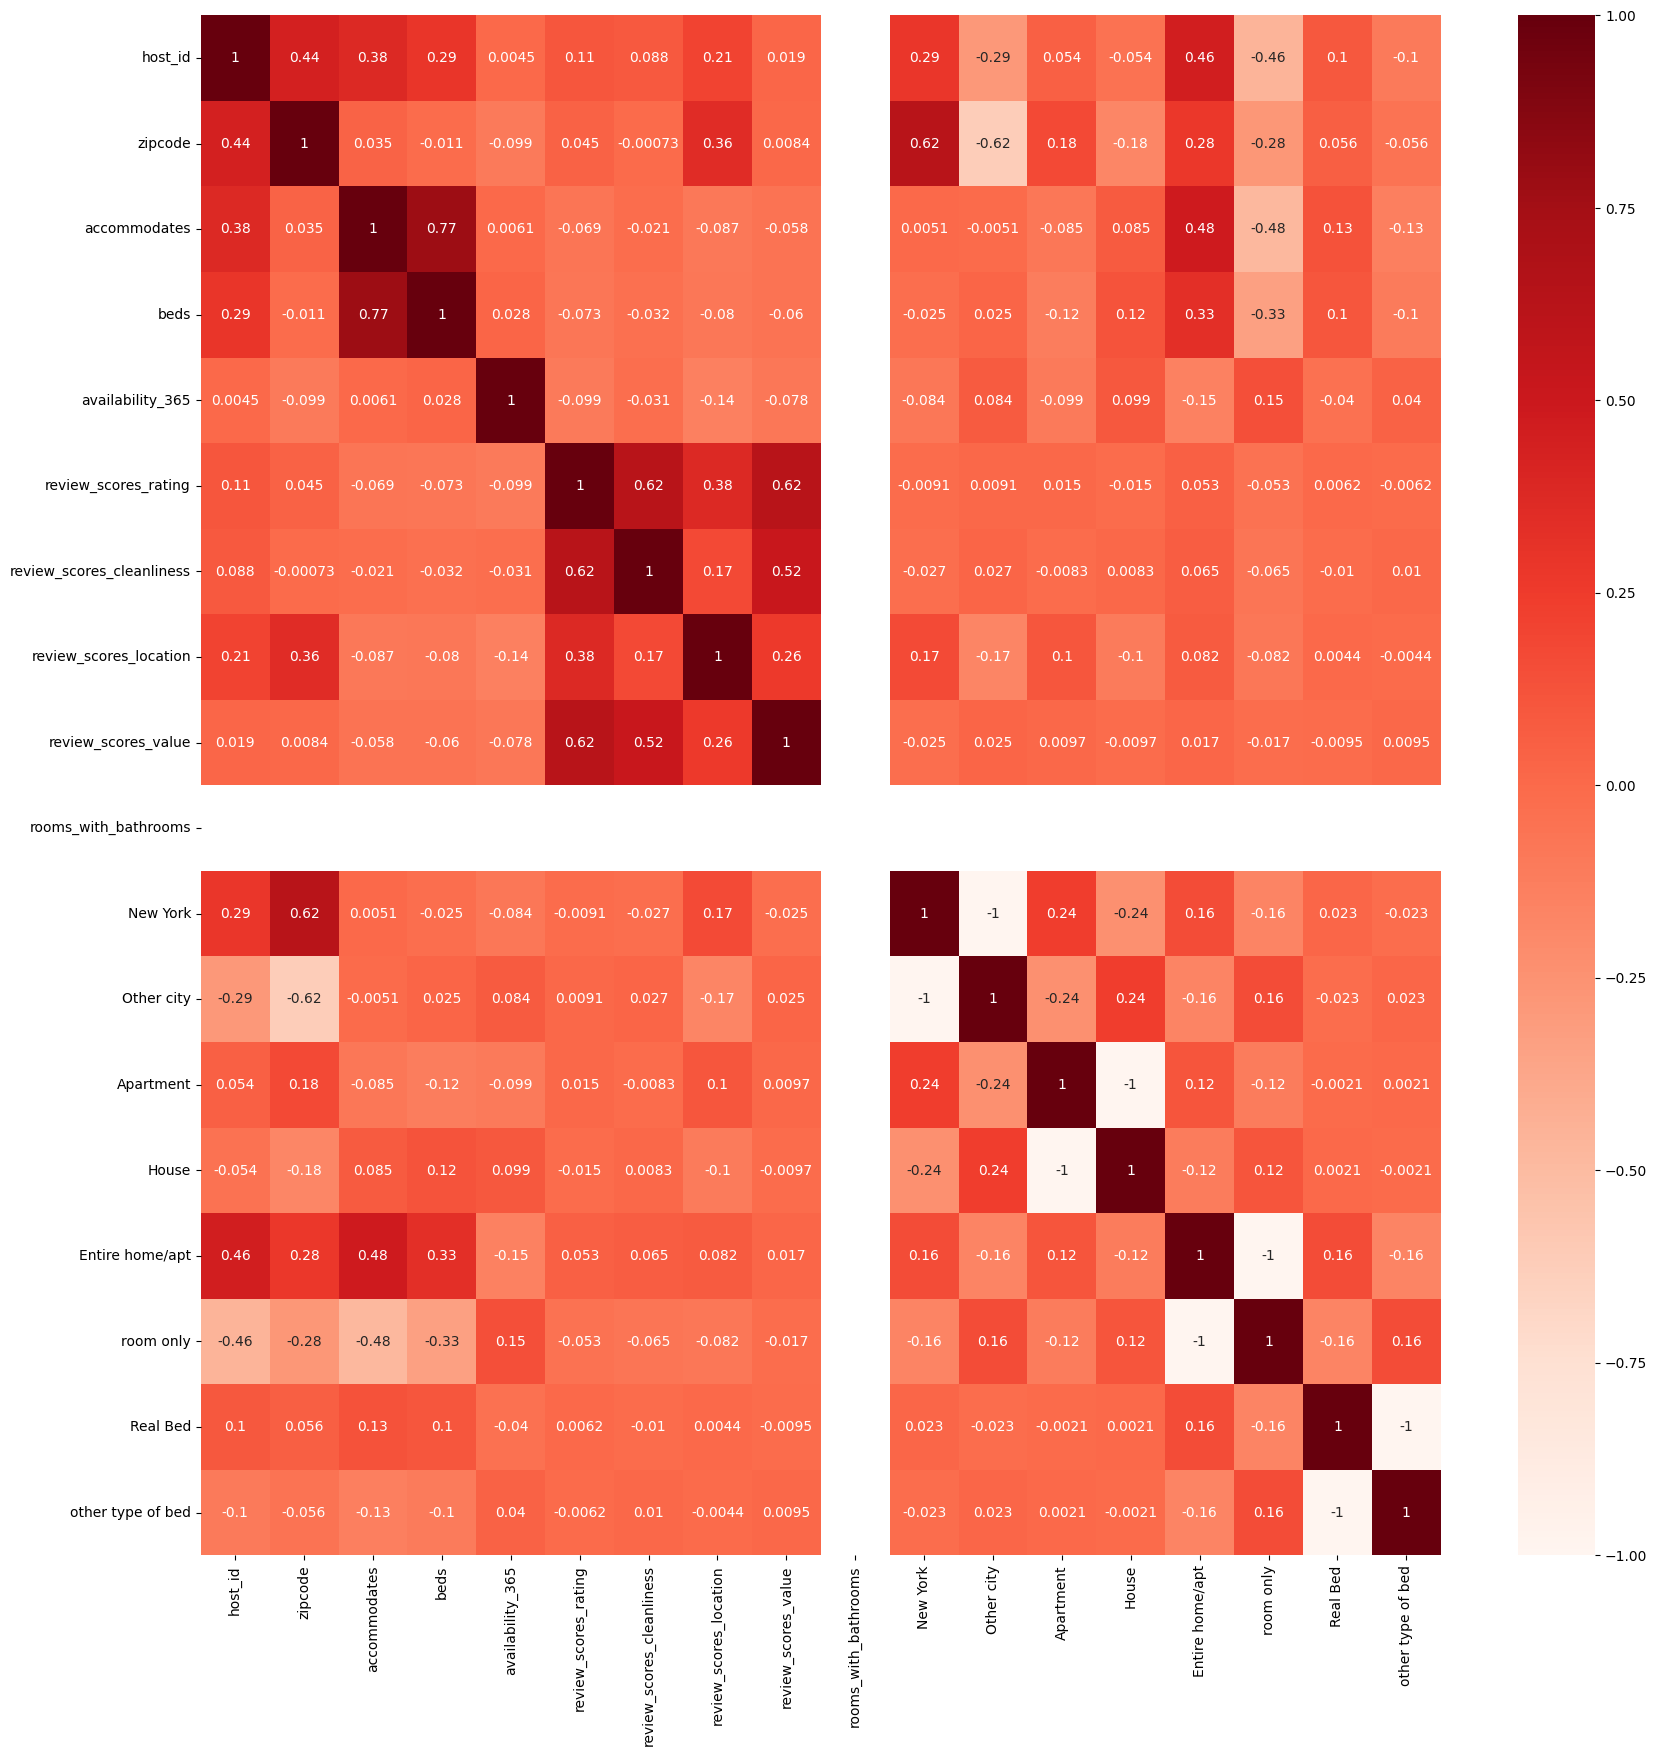

In [94]:
# visualizing correlation of price column with each columns
plt.figure(figsize=(20,20))
sns.heatmap(x_train.corr(), cmap='Reds', annot=True)
plt.show()

Now, drop that column which is negatively correlated with target column

In [95]:
x_train.drop(['availability_365','Other city','other type of bed','room only','House'], axis=1, inplace=True)

In [96]:
print(f'Now, Number of columns : {x_train.shape[1]}')

Now, Number of columns : 13


#### Split the data into train and validation data

In [97]:
# spliting into train, validataion and test data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### Scaling

In [98]:
# importing library
from sklearn.preprocessing import StandardScaler

In [99]:
# scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [100]:
# checking for train data scaling
x_train[:2]

array([[ 4.00466319,  1.09110546,  2.18074559,  2.11361067,  0.12043166,
        -0.1099837 ,  0.63515598, -0.18092107,  0.        ,  0.86319968,
         0.31689321,  0.8445914 ,  0.20953187],
       [ 1.05165783,  1.41835937,  0.80839369, -0.62063462,  0.12043166,
        -0.1099837 ,  0.63515598, -0.18092107,  0.        ,  0.86319968,
         0.31689321,  0.8445914 ,  0.20953187]])

In [101]:
# checking for validation data scaling
x_val[:2]

array([[ 0.66056506, -1.30364398, -0.56395821, -0.62063462, -0.71935676,
        -0.1099837 , -2.02271817, -0.18092107,  0.        ,  0.86319968,
        -3.15563723, -1.18400447,  0.20953187],
       [ 0.42526276,  0.98860596, -0.56395821, -0.62063462,  0.12043166,
        -0.1099837 ,  0.63515598, -0.18092107,  0.        ,  0.86319968,
         0.31689321,  0.8445914 ,  0.20953187]])

----

## 3. Model building with hyperparameter tuning

### Linear Regression using Regularization

In [102]:
# importing ridge regression
from sklearn.linear_model import Ridge

In [103]:
# different values of alpha
alpha = [0.1, 0.001, 1e1, 1e10]

In [104]:
# model building with hyperparameter tuning
for i in range(len(alpha)):

    # ridge regression model
    model = Ridge(alpha = alpha[i])

    # training the model
    model.fit(x_train, y_train)

    # train and validation data prediction
    train_prediction = model.predict(x_train)
    val_prediction = model.predict(x_val)

    # train and validation data score
    train_scr = model.score(x_train, y_train)
    val_scr = model.score(x_val, y_val)

   # printing scores
    print(f'Train score with alpha = {alpha[i]} is {round(train_scr*100,3)}')
    print(f'Validation score with alpha = {alpha[i]} is {round(val_scr*100,3)}')
    print('-'*40,'\n')

Train score with alpha = 0.1 is 88.157
Validation score with alpha = 0.1 is 87.578
---------------------------------------- 

Train score with alpha = 0.001 is 88.157
Validation score with alpha = 0.001 is 87.578
---------------------------------------- 

Train score with alpha = 10.0 is 88.157
Validation score with alpha = 10.0 is 87.577
---------------------------------------- 

Train score with alpha = 10000000000.0 is 0.001
Validation score with alpha = 10000000000.0 is -0.014
---------------------------------------- 



Here, after regularization at the 0.1 value of alpha we are getting good scores on train data as well as validation data 

#### model building with best alpha score

In [105]:
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [106]:
# taking predictions on validation data
y_train_pred = ridge.predict(x_train)
y_val_pred = ridge.predict(x_val)

In [107]:
# printing train and validation data score
print(f'Train data score : {round(ridge.score(x_train, y_train)*100,3)}')
print(f'Validation  data score : {round(ridge.score(x_val, y_val)*100,3)}')

Train data score : 88.157
Validation  data score : 87.578


### Random Forest

In [108]:
# importing libraries
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform

In [109]:
# defining parameters
params = {'ccp_alpha' : uniform(loc=0, scale=0.4),
          'n_estimators' : [100,150,200,250,300,350,400,450,500],
          'bootstrap' : [True,False],
          'max_depth' : [3,4,5,6,7,8,9]
}

In [110]:
# randomized search cv
random = RandomizedSearchCV(estimator = RandomForestRegressor(random_state=7),
                            param_distributions = params,
                            cv = 3,
                            n_iter = 10,
                            n_jobs = -1,
                            verbose = 10
                           )

In [111]:
random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=7),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000168E8E1B170>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   verbose=10)

In [112]:
# display best parameters and scores
print(f'Best params : {random.best_params_}')
print(f'Best score : {round(random.best_score_*100,3)}')

Best params : {'bootstrap': True, 'ccp_alpha': np.float64(0.09723076090925208), 'max_depth': 9, 'n_estimators': 500}
Best score : 91.145


In [113]:
# applying cross validation
forest = RandomForestRegressor(bootstrap = True, ccp_alpha = 0.06994190060883727,
                               max_depth = 9, n_estimators = 450)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(forest, x_train, y_train, 
                                cv = kfold, scoring = 'r2',
                                return_train_score = True)

In [114]:
# display scores
print('K-Fold r2 mean score :')
print(f'Train : {cv_acc_results['train_score'].mean()*100}')
print(f'Validation : {cv_acc_results['test_score'].mean()*100}')

K-Fold r2 mean score :
Train : 95.81019977528396
Validation : 91.53565336422204


Fitting the model

In [115]:
forest.fit(x_train, y_train)

RandomForestRegressor(ccp_alpha=0.06994190060883727, max_depth=9,
                      n_estimators=450)

In [116]:
# taking predictions
y_train_pred_2 = forest.predict(x_train)
y_val_pred_2 = forest.predict(x_val)

In [117]:
# train and validataion data scores
print(f'Train data score : {round(forest.score(x_train, y_train)*100,3)}')
print(f'Validation data score : {round(forest.score(x_val, y_val)*100,3)}')

Train data score : 95.678
Validation data score : 90.888


### XGBoost

In [118]:
# importing libraries 
from xgboost import XGBRegressor

In [120]:
# fitting the model
XGB = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [121]:
# taking predinctions
y_train_pred_3 = XGB.predict(x_train)
y_val_pred_3 = XGB.predict(x_val)

In [122]:
# train and validation data scores
print(f'Train data score : {round(XGB.score(x_train, y_train)*100,3)}')
print(f'Validation data score : {round(XGB.score(x_val, y_val)*100,3)}')

Train data score : 92.368
Validation data score : 91.025


## 4. Evaluation

## Test data prepration 

In [123]:
x_test.head(3)

,host_id,city,zipcode,property_type,room_type,accommodates,beds,bed_type,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,rooms_with_bathrooms
11068,9670169,New York,10009,Apartment,Entire home/apt,4,2.0,Real Bed,301,96.0,10.0,8.0,9.0,2.0
18741,1409438,New York,10027,Apartment,Entire home/apt,2,1.0,Real Bed,364,73.0,8.0,8.0,6.0,2.0
5262,1971672,New York,10024,Apartment,room only,2,1.0,Real Bed,72,100.0,9.0,10.0,10.0,2.0


### Missing value treatment

In [124]:
# calling null_columns functin to get null column list
null_col_liss = null_columns(x_test)
print(f'List of Null columns :\n{null_col_liss}')

List of Null columns :
['zipcode', 'beds', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value', 'rooms_with_bathrooms']


In [125]:
# dataframe of null values column and checking the null values
null_cols = x_test[null_col_liss]
null_cols.isna().sum()

zipcode                        22
beds                           20
review_scores_rating         1761
review_scores_cleanliness    1774
review_scores_location       1774
review_scores_value          1776
rooms_with_bathrooms          104
dtype: int64

In [126]:
# separating the numerical and categorical columns
num_coll = null_cols.select_dtypes(include=['float','int'])
cat_coll = null_cols.select_dtypes(include='object')

In [127]:
# calling num_missing_fill function to fill the numerical values
num_missing_fill(x_test, num_coll)

In [128]:
# calling cat_missing_fill function to fill the categorical values
cat_missing_fill(x_test,cat_coll)

In [129]:
# checking for missing values in test data
x_test.isna().sum()

host_id                      0
city                         0
zipcode                      0
property_type                0
room_type                    0
accommodates                 0
beds                         0
bed_type                     0
availability_365             0
review_scores_rating         0
review_scores_cleanliness    0
review_scores_location       0
review_scores_value          0
rooms_with_bathrooms         0
dtype: int64

### Outlier treatment

In [130]:
# extract numerical column to treat outliers
numerical_colls = x_test.select_dtypes(include=['int','float'])

In [131]:
# calling treat_outlier function from treatment
treat_outliers(x_test, numerical_colls)

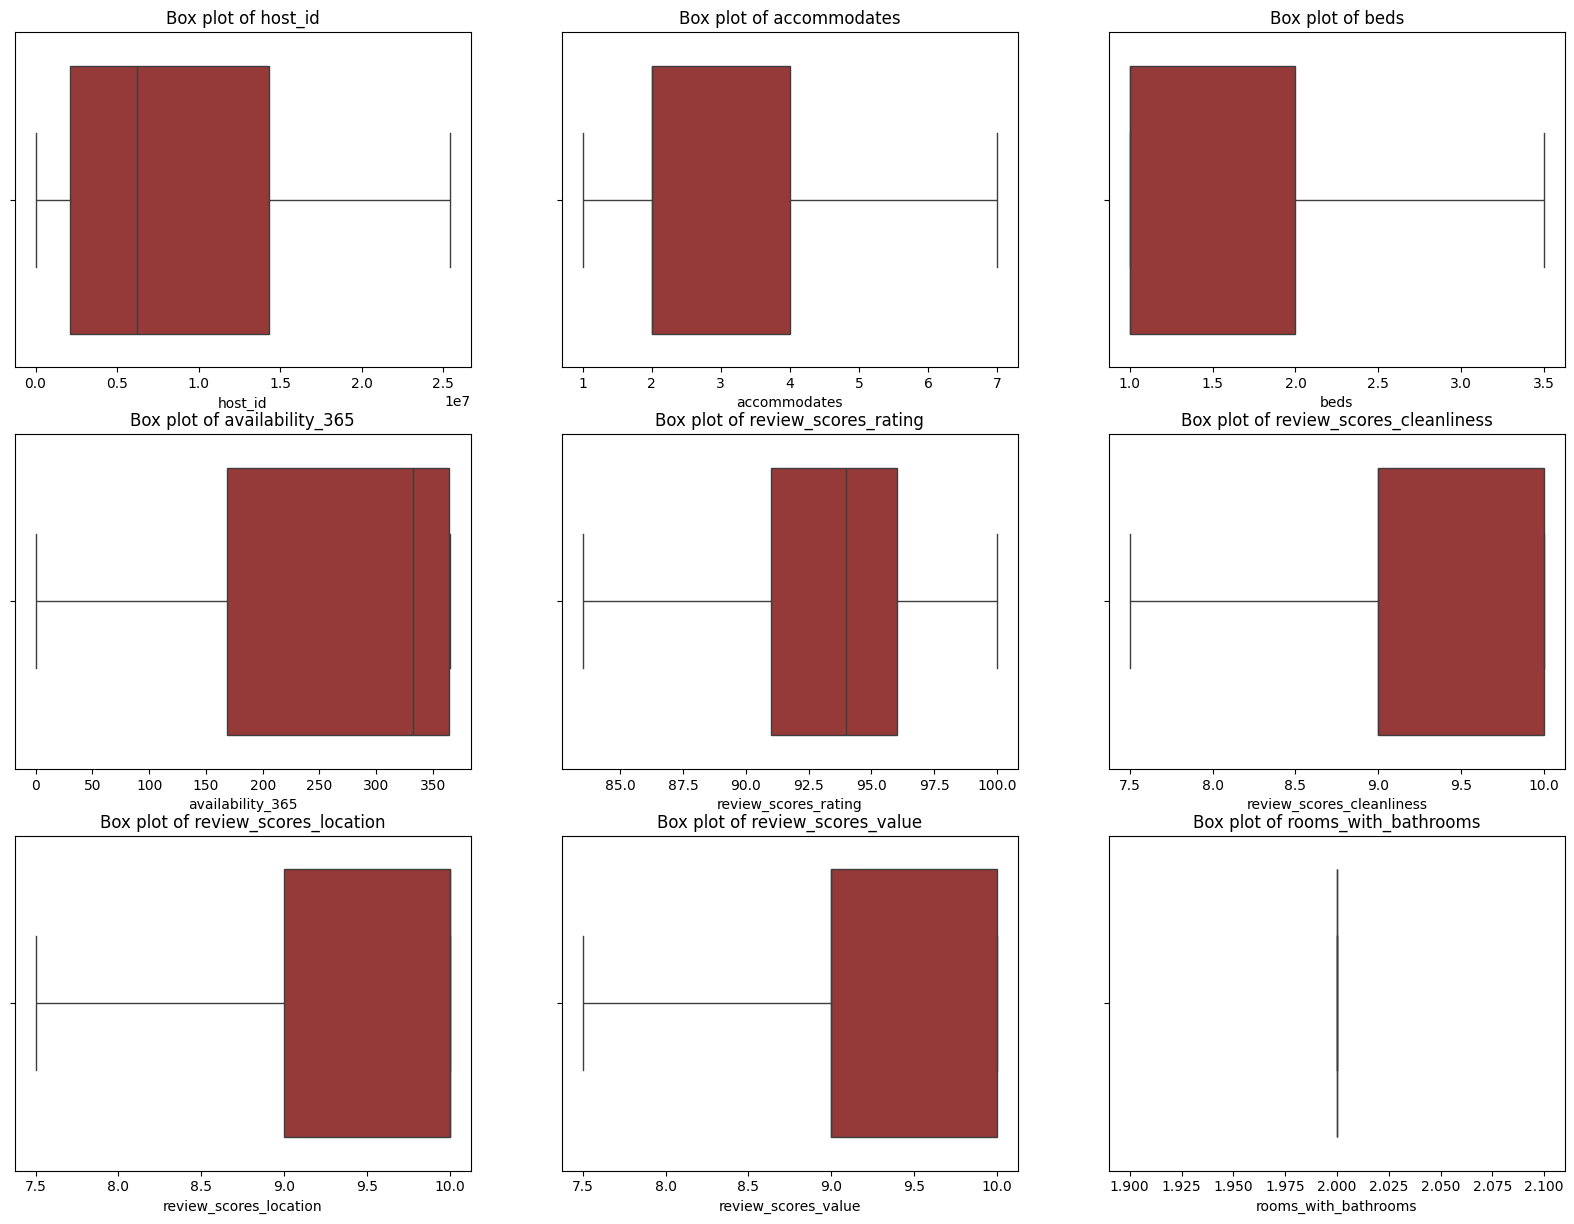

In [132]:
# checking for outliers after treatment in test data
outlier_check(x_test,numerical_colls)

#### Now, all the outliers are treated

### Encoding categorical columns

#### using Target for some categorical columns

In [133]:
# extracting columns
cat_colls = x_test[['host_id','zipcode']]

In [134]:
# calling target_encoder function for test data
target_encoder(x_test, cat_colls, y_test)

#### Using OneHotEncoder for categorical columns 

In [135]:
# extracting categorical column
cate_colls = x_test.select_dtypes(include='object')
cate_colls.columns

Index(['city', 'property_type', 'room_type', 'bed_type'], dtype='object')

In [136]:
# calling one_hot_encoder function
one_hot_encoder(x_test, cate_colls)

In [137]:
x_test.sample(3)

,host_id,city,zipcode,property_type,room_type,accommodates,beds,bed_type,availability_365,review_scores_rating,...,review_scores_value,rooms_with_bathrooms,New York,Other city,Apartment,House,Entire home/apt,room only,Real Bed,other type of bed
27218,175.329068,New York,233.711102,Apartment,Entire home/apt,2,1.0,Real Bed,364,94.0,...,9.0,2.0,1,0,1,0,1,0,1,0
20941,141.903852,Other city,133.261589,Apartment,room only,2,1.0,Real Bed,351,100.0,...,10.0,2.0,0,1,1,0,0,1,1,0
10368,160.366593,New York,136.464467,Apartment,Entire home/apt,2,1.0,Real Bed,363,96.0,...,9.0,2.0,1,0,1,0,1,0,1,0


In [138]:
# then droping that column from test data
x_test.drop(cate_coll, axis=1, inplace=True)

In [139]:
x_test.drop(['availability_365','Other city','other type of bed','room only','House'], axis=1, inplace=True)

### Scaling

In [140]:
# scaling the data
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

In [141]:
# checking for validation data scaling
x_test[:2]

array([[-0.27242641,  0.16800666,  0.81756654,  0.7244898 ,  0.54214358,
         1.28849111, -2.03033405, -0.1940505 ,  0.        ,  0.86768924,
         0.313709  ,  0.83984051,  0.19583667],
       [ 0.07688811, -1.06657612, -0.57318662, -0.63151113, -2.10006721,
        -1.49733925, -2.03033405, -2.60236107,  0.        ,  0.86768924,
         0.313709  ,  0.83984051,  0.19583667]])

### Taking predictions test data with Linear Regression, Random Forest and XGBoost model

In [142]:
# taking prediction 
y_test_regression = ridge.predict(x_test)
y_test_forest = forest.predict(x_test)
y_test_xgb =  XGB.predict(x_test)

## Comparison on the performance of each model using training, validation and test data

In [143]:
# train, validation and test data accuracy with ridge regression model
print(f'Ridge regressing train data score : {round(ridge.score(x_train, y_train)*100,3)}')
print(f'Ridge regressing validataion data score : {round(ridge.score(x_val, y_val)*100,3)}')
print(f'Ridge regressing test data score : {round(ridge.score(x_test, y_test)*100,3)}')

Ridge regressing train data score : 88.157
Ridge regressing validataion data score : 87.578
Ridge regressing test data score : 95.778


In [144]:
# train, validation and test data accuracy with random forest model
print(f'Random forest train data score : {round(forest.score(x_train, y_train)*100,3)}')
print(f'Random forest validataion data score : {round(forest.score(x_val, y_val)*100,3)}')
print(f'Random forest test data score : {round(forest.score(x_test, y_test)*100,3)}')

Random forest train data score : 95.678
Random forest validataion data score : 90.888
Random forest test data score : 96.341


In [146]:
# train, validation and test data accuracy with XGBoost model
print(f'XGBoost train data score : {round(XGB.score(x_train, y_train)*100,3)}')
print(f'XGBoost validataion data score : {round(XGB.score(x_val, y_val)*100,3)}')
print(f'XGBoost test data score : {round(XGB.score(x_test, y_test)*100,3)}')

XGBoost train data score : 92.368
XGBoost validataion data score : 91.025
XGBoost test data score : 85.991


### insights

#### Test data was totally unseen from the models that we preform, after fitting the model and taking the prediction from the train and validatin data then calculate the scores from the data was good, then we prepared the test data and took the prediction and taking out the scores that was good enough and better than the validation scores.